In [20]:
import numpy as np
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt
base=pd.read_csv("Netflix_all.csv")

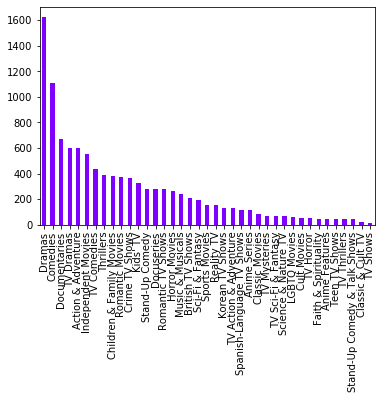

In [22]:
db = pd.DataFrame(base.listed_in.str.split(', ').tolist(), index=base.show_id).stack()

db = db.reset_index([0, 'show_id'])
db.columns = ['show_id', 'genre']
db = db[db.genre != "International Movies"]
db = db[db.genre != "International TV Shows"]
db = db[db.genre != "Movies"]

db['genre'].value_counts().plot(kind='bar', colormap='rainbow');


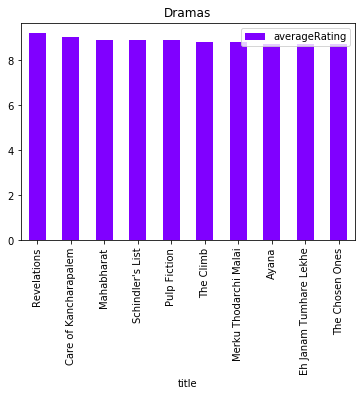

In [36]:
merge = base.merge(db, on='show_id')
merge = merge[merge.genre == "Dramas"].sort_values(by='averageRating',ascending=False).head(10)
merge = merge.drop(["show_id",'type', 'director', "cast", "country", "date_added", "release_year", "duration", "rating", "listed_in", "description", "numVotes", "month_added", "year_added"], axis=1)

merge.plot(title="Dramas", x="title", y="averageRating", kind='bar', colormap='rainbow');